# Linear Classifier vs Non-linear Classifier

In [1]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import collections
%matplotlib inline

def live_plot(X, y, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.scatter(X[y==0].T[0], X[y==0].T[1], color='red')
    plt.scatter(X[y==1].T[0], X[y==1].T[1], color='blue')
    plt.scatter(X[y==2].T[0], X[y==2].T[1], color='green')
    plt.title(title)
    plt.show();

In [2]:
import numpy as np
import torch
import pandas as pd
from sklearn.datasets import make_blobs, make_circles

In [3]:
X, y = make_circles(random_state=0, noise=0.02)

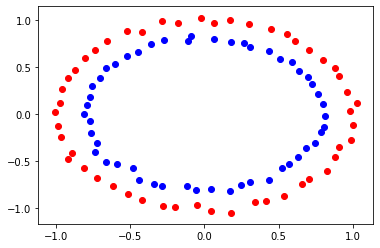

In [4]:
plt.scatter(X[y==0].T[0], X[y==0].T[1], color='red')
plt.scatter(X[y==1].T[0], X[y==1].T[1], color='blue')
plt.scatter(X[y==2].T[0], X[y==2].T[1], color='green')
plt.show()

## Making a Linear Classifier

In [5]:
class LinearModel(torch.nn.Module):
    
    def __init__(self, input_size, num_classes, max_iter=1000, lr=1e-3):
        
        super().__init__()
        
        # Neural Network Architecture
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=num_classes)
        self.activation = torch.nn.LogSigmoid()
    
    def forward(self, X):
        X = self.dense1(X)
        X = self.activation(X)
        return X

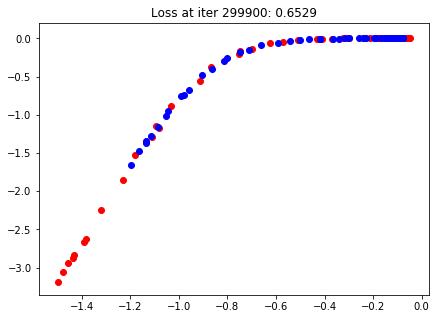

In [13]:
num_features = X.shape[1]
num_classes = 2
max_iter = 300000
model = LinearModel(num_features, num_classes)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
criterion = torch.nn.CrossEntropyLoss()

Xt = torch.FloatTensor(X)
yt = torch.LongTensor(y)

for i in range(max_iter):
    optimizer.zero_grad()
    y_pred = model(Xt)
    loss = criterion(input=y_pred, target=yt)
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        with torch.no_grad():
            live_plot(y_pred.detach().numpy(), y, title=f"Loss at iter {i}: {loss.item():.4f}")

In [14]:
with torch.no_grad():
    y_pred = model.forward(Xt)
    y_pred = torch.argmax(y_pred, dim=1).detach().numpy()
    print(f"Classifier Accuracy: {accuracy_score(y_true=y, y_pred=y_pred) * 100}%")

Classifier Accuracy: 56.99999999999999%


## Making a Non-linear classifier

In [8]:
class NonLinearModel(torch.nn.Module):
    
    def __init__(self, input_size, num_classes, max_iter=1000, lr=1e-3):
        
        super().__init__()
        
        # Neural Network Architecture
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=20*num_classes)
        self.activation1 = torch.nn.LogSigmoid()
        self.dense2 = torch.nn.Linear(in_features=20*num_classes, out_features=num_classes)
        self.activation2 = torch.nn.LogSigmoid()
        
    def forward(self, X):
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.activation2(X)
        return X

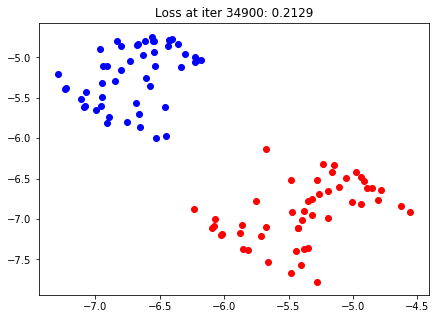

In [9]:
num_features = X.shape[1]
num_classes = 2
max_iter = 35000
model = NonLinearModel(num_features, num_classes)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
criterion = torch.nn.CrossEntropyLoss()

Xt = torch.FloatTensor(X)
yt = torch.LongTensor(y)

for i in range(max_iter):
    optimizer.zero_grad()
    y_pred = model(Xt)
    loss = criterion(input=y_pred, target=yt)
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        with torch.no_grad():
            live_plot(y_pred.detach().numpy(), y, title=f"Loss at iter {i}: {loss.item():.4f}")

In [10]:
with torch.no_grad():
    y_pred = model.forward(Xt)
    y_pred = torch.argmax(y_pred, dim=1).detach().numpy()
    print(f"Classifier Accuracy: {accuracy_score(y_true=y, y_pred=y_pred) * 100}%")

Classifier Accuracy: 100.0%
